In this notebook, we will look at a few different ways of visualizing the chemical space covered by a set of molecules. We will cover principal component anlaysis (PCA) and t-distributed stochastic neighbor embedding (t-sne)

We will start by importing a the necessary Python libraries

In [1]:
import pandas as pd
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

We set a few parameters to improve the appearance of our plots

In [2]:
sns.set(rc={'figure.figsize': (10, 10)})
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

Read the input data.  This is a set of ERK2 inhibitors, and associated decoy molecules, from the DUD-E database. 

In [3]:
df = pd.read_csv("~/Desktop/pfas_machine_learning/supporting_info_oecd/supporting_4.csv")

Take a look at how many rows and columns we have in the data

In [4]:
df.shape

(1012, 27)

Look at the first few lines in the dataframe.

In [5]:
df.head()

,PCBA1030,PCBA1461,PCBA1468,PCBA1688,PCBA2546,PCBA2551,PCBA504332,PCBA504339,PCBA504444,PCBA504467,...,PCBA686978,PCBA686979,PCBA720504,PCBA720579,PCBA720580,PCBA883,PCBA884,PCBA891,PCBA938,SMILES
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,O=C(NC(Nc1ccc(F)cc1)(C(F)(F)F)C(F)(F)F)c1cccnc1
1,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CCC1CN2CCC1CC2[C@@H](NC(=S)Nc1cc(C(F)(F)F)cc(C...
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,CC(NC(=O)NNC(=O)c1ccncc1)(C(F)(F)F)C(F)(F)F
3,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,CCC(NC(=O)NCc1ccccc1)(C(F)(F)F)C(F)(F)F
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,OC(c1ccccc1)(c1nc(/C=C/c2ccc(C(F)(F)F)cc2)cs1)...


In [6]:
from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(df,'SMILES','Mol')

,PCBA1030,PCBA1461,PCBA1468,PCBA1688,PCBA2546,PCBA2551,PCBA504332,PCBA504339,PCBA504444,PCBA504467,...,PCBA686979,PCBA720504,PCBA720579,PCBA720580,PCBA883,PCBA884,PCBA891,PCBA938,SMILES,Mol
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,O=C(NC(Nc1ccc(F)cc1)(C(F)(F)F)C(F)(F)F)c1cccnc1,
1,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CCC1CN2CCC1CC2[C@@H](NC(=S)Nc1cc(C(F)(F)F)cc(C...,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,CC(NC(=O)NNC(=O)c1ccncc1)(C(F)(F)F)C(F)(F)F,
3,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,CCC(NC(=O)NCc1ccccc1)(C(F)(F)F)C(F)(F)F,
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,OC(c1ccccc1)(c1nc(/C=C/c2ccc(C(F)(F)F)cc2)cs1)...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,O=C(NCCNC(=O)c1cc(OCC(F)(F)F)ccc1OCC(F)(F)F)Nc...,
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O=C(NCc1cc(C(F)(F)F)ccc1Cl)c1cccc2c1C(=O)c1ccc...,
1009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,CCCNc1nc(OCC(F)(F)F)nc(OCC(F)(F)F)n1,
1010,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,O=C(Cn1nnc(-c2cccc(C(F)(F)F)c2)n1)NNS(=O)(=O)c...,

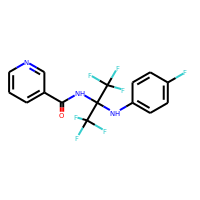
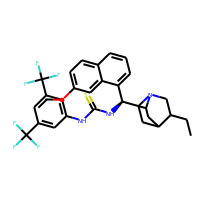
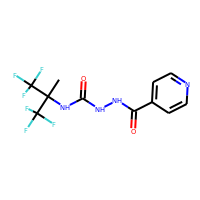
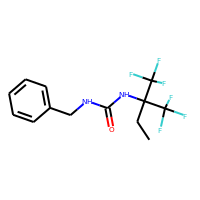
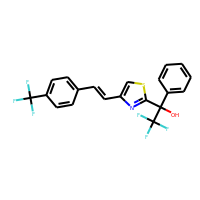
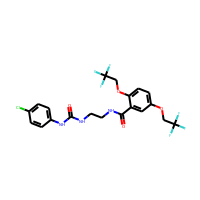
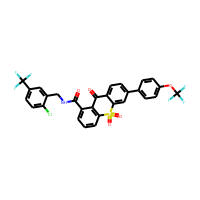
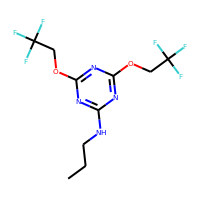
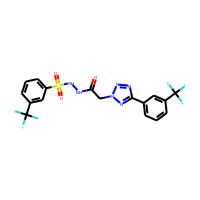
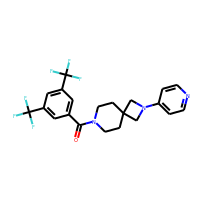

In [7]:
df

Define a couple of functions to convert a list SMILES to a list of fingerprints.

In [8]:
def fp_list_from_smiles_list(smiles_list,n_bits=2048):
    fp_list = []
    for smiles in tqdm(smiles_list):
        mol = Chem.MolFromSmiles(smiles)
        fp_list.append(fp_as_array(mol,n_bits))
    return fp_list

def fp_as_array(mol,n_bits=2048):
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=n_bits)
    arr = np.zeros((1,), np.int)
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

Convert the SMILES from our dataframe to fingerprints.

In [9]:
fp_list = fp_list_from_smiles_list(df.SMILES)

100%|██████████| 1012/1012 [00:00<00:00, 2483.02it/s]


Perform principal component analysis (PCA) on the fingerprints.

In [10]:
for i in range(0,2048):
    print(fp_list[15][i], end = '')

0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000010000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000001000000000001000000000000000000000000100000000000000000000000000000000100000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001010000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
crds = pca.fit_transform(fp_list) 

Put the coordinates from the PCA into a dataframe.

In [12]:
crds_df = pd.DataFrame(crds,columns=["PC_1","PC_2"])
crds_df['PCBA883'] = list(df.PCBA883)
crds_df.head()

,PC_1,PC_2,PCBA883
0,-1.328838,0.223595,NaN
1,0.725877,0.668788,NaN
2,-1.048737,0.321278,NaN
3,-1.026471,0.217211,NaN
4,-0.448325,-0.819076,NaN


In [13]:
crds_df

,PC_1,PC_2,PCBA883
0,-1.328838,0.223595,NaN
1,0.725877,0.668788,NaN
2,-1.048737,0.321278,NaN
3,-1.026471,0.217211,NaN
4,-0.448325,-0.819076,NaN
...,...,...,...
1007,-1.582326,2.718721,NaN
1008,-0.562850,1.504170,NaN
1009,-1.350262,-0.479626,NaN
1010,0.241826,0.553216,NaN


Make a plot of the principal components. Note that the points representing the active molecules (red) are obscured by the blue points (decoys)

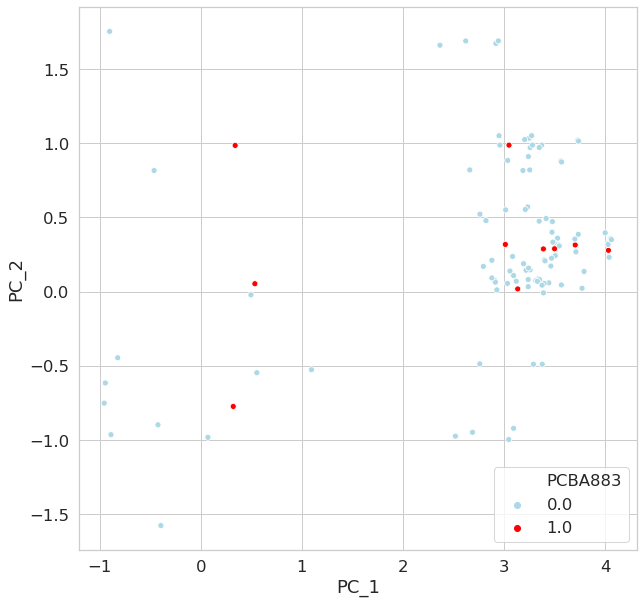

In [14]:
ax = sns.scatterplot(data=crds_df,x="PC_1",y="PC_2",hue="PCBA883",palette={0:'lightblue',1:'red'})

If we make this plot in two steps, and first plot the decoys then plot the actives, the actives will be much easier to see. 

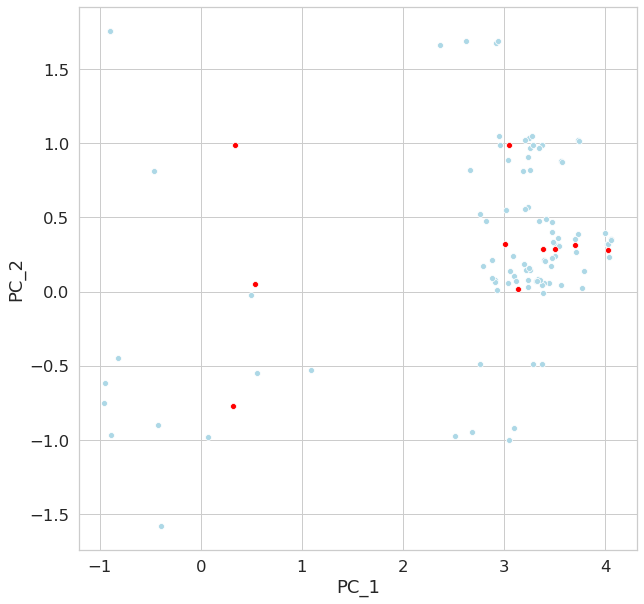

In [15]:
ax = sns.scatterplot(data=crds_df.query("PCBA883 == 0"),x="PC_1",y="PC_2",color='lightblue')
ax = sns.scatterplot(data=crds_df.query("PCBA883 == 1"),x="PC_1",y="PC_2",color='red')


#xs = crds_df["PC_1"]
#ys = crds_df["PC_2"]
#label = crds_df.index.values

#fig, ax = plt.subplots()
#ax.scatter(xs, ys)

#for i, txt in enumerate(label):
#    ax.annotate(txt, (xs[i], ys[i]))
#ax = sns.scatterplot(data=crds_df.query("is_active == 1"),x="PC_1",y="PC_2",color='red')

    
#fig.set_size_inches(12, 12)
#for x,y in zip(xs,ys):
#
#    plt.annotate(label, # this is the text
#                 (x,y), # this is the point to label
#                 textcoords="offset points", # how to position the text
#                 xytext=(0,0), # distance from text to points (x,y)
#                 ha='center') # horizontal alignment can be left, right or center

#_ = plt.legend(labels=['Decoy', 'Active'])

Run the t-sne on the 50 principal component database we created above.

In [16]:
from sklearn.manifold import TSNE
%time crds_embedded = TSNE(n_components=2).fit_transform(crds)

CPU times: user 23.8 s, sys: 29 ms, total: 23.8 s
Wall time: 3.18 s


Put the t-sne dataset into a dataframe to simplify plotting.

In [17]:
#tsne_df.to_csv("../data/pfas_CF3_tnse_all.csv",index=False)
tsne_df = pd.DataFrame(crds_embedded,columns=["X","Y"])

tsne_df['PCBA1030'] = df['PCBA1030']
tsne_df['PCBA1461'] = df['PCBA1461']
tsne_df['PCBA1468'] = df['PCBA1468']
tsne_df['PCBA1688'] = df['PCBA1688']
tsne_df['PCBA2546'] = df['PCBA2546']
tsne_df['PCBA2551'] = df['PCBA2551']
tsne_df['PCBA504332'] = df['PCBA504332']
tsne_df['PCBA504339'] = df['PCBA504339']
tsne_df['PCBA504444'] = df['PCBA504444']
tsne_df['PCBA504467'] = df['PCBA504467']
tsne_df['PCBA540276'] = df['PCBA540276']
tsne_df['PCBA588855'] = df['PCBA588855']
tsne_df['PCBA624288'] = df['PCBA624288']
tsne_df['PCBA624296'] = df['PCBA624296']
tsne_df['PCBA624417'] = df['PCBA624417']
tsne_df['PCBA651635'] = df['PCBA651635']
tsne_df['PCBA686970'] = df['PCBA686970']
tsne_df['PCBA686978'] = df['PCBA686978']
tsne_df['PCBA686979'] = df['PCBA686979']
tsne_df['PCBA720504'] = df['PCBA720504']
tsne_df['PCBA720579'] = df['PCBA720579']
tsne_df['PCBA720580'] = df['PCBA720580']
tsne_df['PCBA883'] = df['PCBA883']
tsne_df['PCBA884'] = df['PCBA884']
tsne_df['PCBA891'] = df['PCBA891']
tsne_df['PCBA938'] = df['PCBA938']

tsne_df.to_csv("../data/pfas_C3F6_tnse_all.csv",index=False)

Look at the first few lines of the dataframe.

In [18]:
tsne_df = pd.read_csv("../data/pfas_C3F6_tnse_all.csv")
tsne_df.head()

,X,Y,PCBA1030,PCBA1461,PCBA1468,PCBA1688,PCBA2546,PCBA2551,PCBA504332,PCBA504339,...,PCBA686970,PCBA686978,PCBA686979,PCBA720504,PCBA720579,PCBA720580,PCBA883,PCBA884,PCBA891,PCBA938
0,9.570444,-29.385376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,-24.705353,3.126128,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.531211,-22.196024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,6.276492,-20.873486,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,10.432046,3.069335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN


Plot the distribution of the active and decoy molecule with t-sne.  Note that, as above, we plot in two steps to avoid obscuring the red points. 

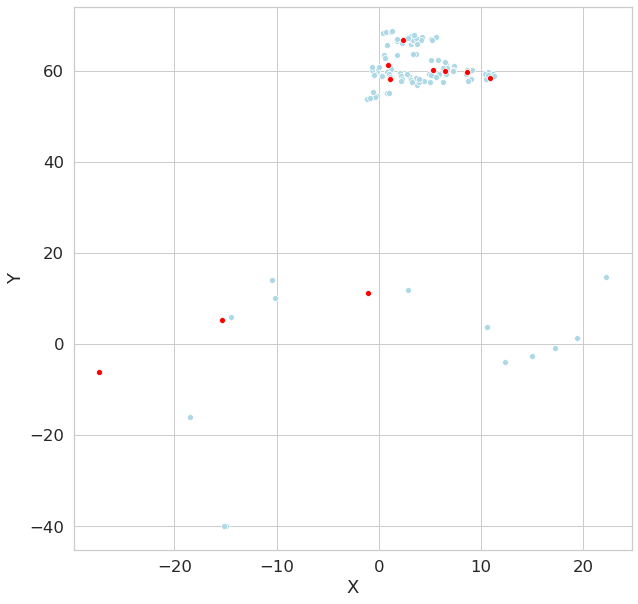

In [19]:
ax = sns.scatterplot(data=tsne_df.query("PCBA883 == 0"),x="X",y="Y",color='lightblue')
ax = sns.scatterplot(data=tsne_df.query("PCBA883 == 1"),x="X",y="Y",color='red')

#ax = sns.scatterplot(data=tsne_df.query("is_active == 0 & X < -10 & Y < -20"),x="X",y="Y",color='lightblue')
#ax = sns.scatterplot(data=tsne_df.query("is_active == 1 & X < -10 & Y < -20"),x="X",y="Y",color='red')

#ax = sns.scatterplot(data=tsne_df.query("is_active ==0 & X < -15 & X > -16 & Y > -29 & Y < -25"),x="X",y="Y",color='lightblue')
#ax = sns.scatterplot(data=tsne_df.query("is_active == 1 & X < -15 & X > -16 & Y > -29 & Y < -25"),x="X",y="Y",color='red')


/home/hyuna/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  from ipykernel import kernelapp as app


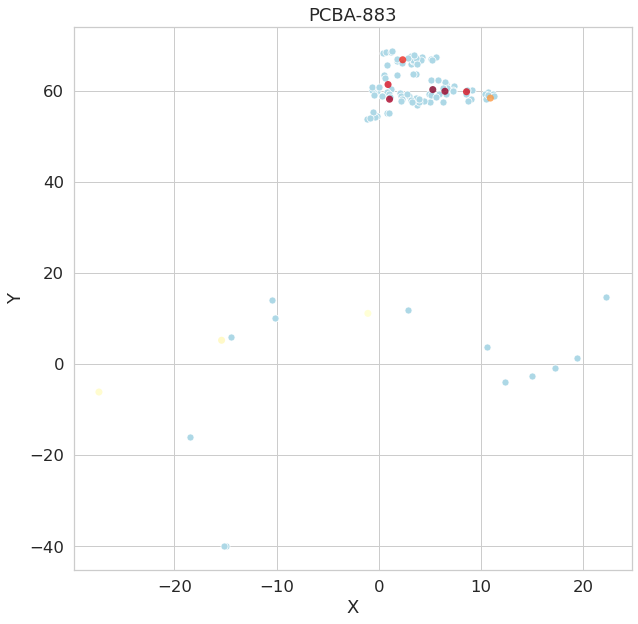

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate fake data
x = tsne_df.query("PCBA883 == 1")["X"]
y = tsne_df.query("PCBA883 == 1")["Y"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax = sns.scatterplot(data=tsne_df.query("PCBA883 == 0"),x="X",y="Y", s=50, color='lightblue')
ax.scatter(x, y, c=z, s=50, edgecolor='',cmap="YlOrRd",alpha=0.8)
plt.title("PCBA-883")
#fig.colorbar(ax)
#plt.colorbar()
plt.show()

/home/hyuna/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  from ipykernel import kernelapp as app


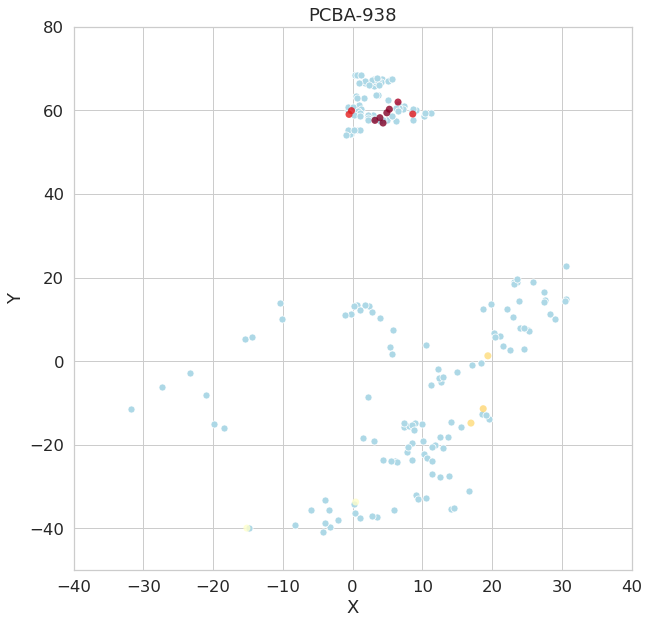

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate fake data
x = tsne_df.query("PCBA938 == 1")["X"]
y = tsne_df.query("PCBA938 == 1")["Y"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax = sns.scatterplot(data=tsne_df.query("PCBA938 == 0"),x="X",y="Y", s=50, color='lightblue')
ax.scatter(x, y, c=z, s=50, edgecolor='',cmap="YlOrRd",alpha=0.8)
plt.title("PCBA-938")
plt.xlim(-40,40)
plt.ylim(-50,80)
#fig.colorbar(ax)
#plt.colorbar()
plt.show()

/home/hyuna/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


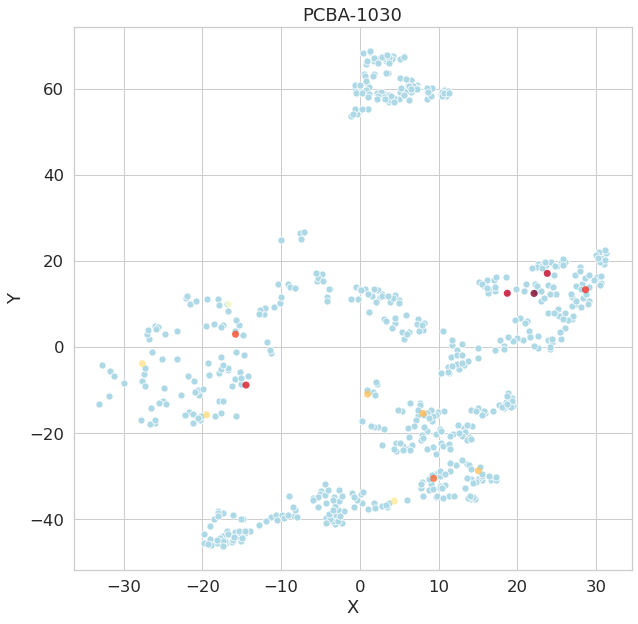

In [30]:
# Generate fake data
x = tsne_df.query("PCBA1030 == 1")["X"]
y = tsne_df.query("PCBA1030 == 1")["Y"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax = sns.scatterplot(data=tsne_df.query("PCBA1030 == 0"),x="X",y="Y", s=50, color='lightblue')
ax.scatter(x, y, c=z, s=50, edgecolor='',cmap="YlOrRd",alpha=0.8)
plt.title("PCBA-1030")
#fig.colorbar(ax)
#plt.colorbar()
plt.show()

Create a new dataframe with the data we want to save to disk. 

In [25]:
output_tsne_df = pd.concat([crds_df[["PC_1","PC_2"]],tsne_df[["X","Y"]],df["PCBA883"],df["Mol"]],axis=1)
rslt_df = output_tsne_df.loc[(output_tsne_df['X'] < 40) & (output_tsne_df['X'] > 20) & (output_tsne_df['Y'] > -30) & (output_tsne_df['Y'] < 10) & (output_tsne_df['PCBA883']==1)]
rslt_df

,PC_1,PC_2,X,Y,PCBA883,Mol


In [26]:
#output_tsne_df = pd.concat([df["Name"],crds_df[["PC_1","PC_2"]],tsne_df[["X","Y"]],df["is_active"],df["Mol"]],axis=1)
#rslt_df = output_tsne_df[output_tsne_df.index==38066]
#rslt_df

In [27]:
len(output_tsne_df)

1012

In [28]:
print("FP")
FP = len(rslt_df[(rslt_df['is_active']==0)])
print(FP)

FP


KeyError: 'is_active'

In [ ]:
print("TP")
TP = len(rslt_df[(rslt_df['is_active']==1)])
print(TP)

In [ ]:
FN = len(tsne_df[(tsne_df['is_active']==1)]) - TP
print("FN")
print(FN)

In [ ]:
TN = len(tsne_df[(tsne_df['is_active']==0)]) - FN
print("TN")
print(TN)

In [ ]:
Sensitivity = TP/(TP+FN)
Specificity = (TN)/(TN+FP)
Precision = TP/(TP+FP)
Accuracy = (TP+TN)/(TP+FP+TN+FN)
Adjusted_accuracy = (Sensitivity+Specificity)/2
print("Sensitivity:      ",Sensitivity)
print("Specificity:      ",Specificity)
print("Precision:        ",Precision)
print("Accuracy:         ",Accuracy)
print("Adjusted_accuracy:",Adjusted_accuracy,"\n")

Write the dataframe to a csv file.  Note that we set "index=False" to avoid writling line numbers to the csv file.

In [ ]:
output_tsne_df.to_csv("../data/pfas_CF3_1030_tnse.csv",index=False)

In [ ]:
from bokeh.plotting import figure, show, output_notebook, ColumnDataSource
from bokeh.models import HoverTool
output_notebook()

In [ ]:
source = ColumnDataSource(data=dict(x=output_tsne_df["X"], y=output_tsne_df["Y"],desc = list(output_tsne_df.index.values)))

hover = HoverTool(tooltips="""
    <div>
        <div>@svgs{safe}
        </div>
        <div>
            <span style="font-size: 17px; font-weight: bold;">@desc</span>
        </div>
    </div>
    """
)
p = figure(plot_width=700, plot_height=700, tools=['reset,box_zoom,wheel_zoom,zoom_in,zoom_out,pan',hover],
           title="Mouse over the dots")
p.circle('x', 'y', size=10, source=source, fill_alpha=0.2,);

In [ ]:
#print(output_tsne_df["Mol"])

In [ ]:
show(p)

In [ ]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpld3
from rdkit import Chem
from rdkit.Chem import RDConfig
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem import DataStructs
from sklearn.decomposition import PCA
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from mpld3 import plugins
mpld3.enable_notebook()


In [ ]:
def fp2arr(fp):
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp,arr)
    return arr

# Original code is described in the rdkit blog post.
# http://rdkit.blogspot.com/2015/02/new-drawing-code.html

def moltosvg(mol,molSize=(225,75),kekulize=True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg.replace('svg:','')

In [ ]:
fpgen = rdFingerprintGenerator.GetMorganGenerator(2)
mols_inactive = output_tsne_df.query("is_active == 0")["Mol"]
for m in mols_inactive:
    AllChem.Compute2DCoords(m)
fps = [fpgen.GetFingerprint(m) for m in mols_inactive]
X = np.asarray([fp2arr(fp) for fp in fps])
X.shape


In [ ]:
pca = PCA(n_components=3)
res = pca.fit_transform(X)

In [ ]:
svgs_inactive = [moltosvg(m) for m in mols_inactive]

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 10)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_title('Viz chemical space!')
points_inactive = ax.scatter(output_tsne_df["X"], output_tsne_df["Y"])
tooltip_inactive = plugins.PointHTMLTooltip(points_inactive, svgs_inactive)
plugins.connect(fig, tooltip_inactive)
#ax = sns.scatterplot(data=tsne_df.query("is_active == 1"),x="X",y="Y",color='red')

In [ ]:
fpgen = rdFingerprintGenerator.GetMorganGenerator(2)
mols_active = output_tsne_df.query("is_active == 1")["Mol"]
for m in mols_active:
    AllChem.Compute2DCoords(m)
fps = [fpgen.GetFingerprint(m) for m in mols_active]
X = np.asarray([fp2arr(fp) for fp in fps])
print(X.shape)

svgs_active = [moltosvg(m) for m in mols_active]
fig_active, ax = plt.subplots()
fig_active.set_size_inches(14, 10)
ax = sns.scatterplot(data=tsne_df.query("is_active == 1"),x="X",y="Y",color='red')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_title('Viz chemical space!')
points_active = ax.scatter(output_tsne_df["X"], output_tsne_df["Y"])
tooltip_active = plugins.PointHTMLTooltip(points_active, svgs_active)
plugins.connect(fig_active, tooltip_active)
